# Linear Regression

### Dataset

In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(os.getcwd() + '/data.csv')
train_size = round(0.8 * len(df))
test_size = len(df) - train_size
df_train = df[:train_size]
df_test = df[:test_size]
train = df[:train_size].to_numpy()
test = df[:test_size].to_numpy()

## Data Exploration

### Lot of acres

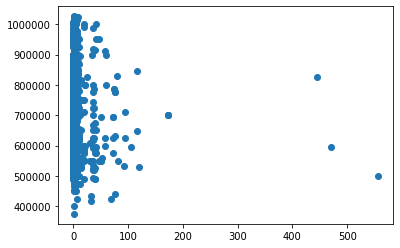

In [3]:
plt.scatter(df['lot_acres'], df['sold_price'])

In [4]:
df = df[df.lot_acres < 50]
plt.scatter(df['lot_acres'], df['sold_price'])
plt.xlabel('Lot of acres')
plt.ylabel('Sold price')
plt.title('Sold price by the lot of acres')

Text(0.5, 1.0, 'Sold price by the lot of acres')

### Year built

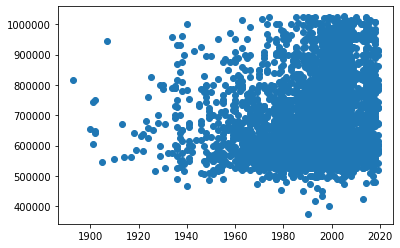

In [5]:
plt.scatter(df['year_built'], df['sold_price'])

Text(0.5, 1.0, 'Sold price by the year built')

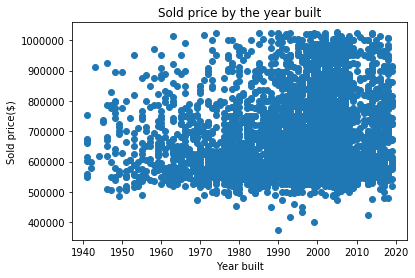

In [6]:
df = df[df.year_built > 1940]
plt.scatter(df['year_built'], df['sold_price'])
plt.xlabel('Year built')
plt.ylabel('Sold price($)')
plt.title('Sold price by the year built')

### Taxes

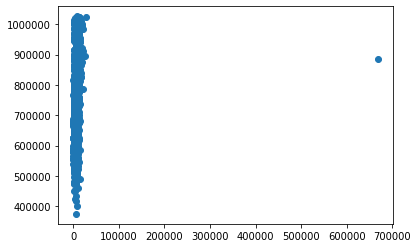

In [7]:
plt.scatter(df['taxes'], df['sold_price'])

In [8]:
df = df[df.taxes < 100000]

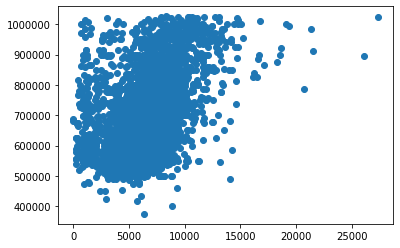

In [9]:
plt.scatter(df['taxes'], df['sold_price'])

In [10]:
df = df[df.taxes < 15000]

Text(0.5, 1.0, 'Sold price by taxes')

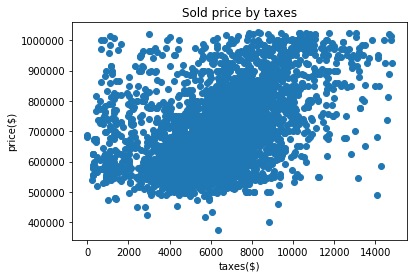

In [11]:
plt.scatter(df['taxes'], df['sold_price'])
plt.xlabel('taxes($)')
plt.ylabel('price($)')
plt.title('Sold price by taxes')

### HOA 

In [12]:
plt.scatter(df['HOA'], df['sold_price'])

In [13]:
df = df[df.HOA < 4000]
plt.scatter(df['HOA'], df['sold_price'])

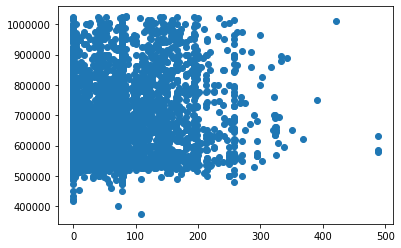

In [14]:
df = df[df.HOA < 500]
plt.scatter(df['HOA'], df['sold_price'])

Text(0.5, 1.0, 'Sold Price by HOA')

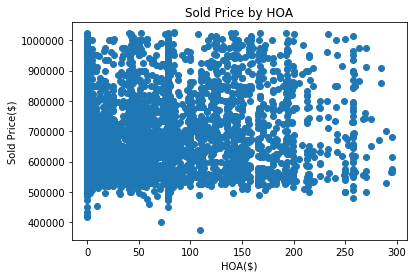

In [15]:
df = df[df.HOA < 300]
plt.scatter(df['HOA'], df['sold_price'])
plt.xlabel('HOA($)')
plt.ylabel('Sold Price($)')
plt.title('Sold Price by HOA')

## Square feet

In [16]:
plt.scatter(df['sqrt_ft'], df['sold_price'])
plt.xlabel('Square feet')
plt.ylabel('Sold price')
plt.title('Sold price by square feet')
plt.xticks([])

([], <a list of 0 Text xticklabel objects>)

## Linear Regression

$$ \hat{y} = \hat{\alpha} + \hat{\beta} x$$
$$ \hat{\beta} = \frac{\sum_{i=1}^{n}(x_{i} - \overline{x})(y_{i}-\overline{y})} {\sum_{i=1}^{n}(x_{i}-\overline{x})^2}$$
$$ \hat{\alpha}=\overline{y}-\beta \overline{x} $$

In [17]:
def univariate_linear_regression(x, y):
    b = np.sum((x- np.mean(x)) * (y - np.mean(y)) ) / (np.sum((x - np.mean(x))**2))
    a = np.mean(y) - b*np.mean(x)
    return a, b

In [18]:
taxes_a, taxes_b = univariate_linear_regression(df['taxes'], df['sold_price'])
hoa_a, hoa_b = univariate_linear_regression(df['HOA'], df['sold_price'])
acres_a, acres_b = univariate_linear_regression(df['lot_acres'], df['sold_price'])
year_a, year_b = univariate_linear_regression(df['year_built'], df['sold_price'])

### Evaluate linear regression models

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^2 $$

In [19]:
def mse(n, y, y_hat):
    return (1/n) * np.sum( (y - y_hat)**2 )

In [20]:
taxes_preds = np.array([(taxes_a + taxes_b*x) for x in df['taxes']])
hoa_preds = np.array([(taxes_a + taxes_b*x) for x in df['HOA']])
acres_preds = np.array([(taxes_a + taxes_b*x) for x in df['lot_acres']])
year_preds = np.array([(taxes_a + taxes_b*x) for x in df['year_built']])
n = len(df)
taxes_mse = mse(n, df['taxes'], taxes_preds)
hoa_mse = mse(n, df['HOA'], taxes_preds)
acres_mse = mse(n, df['lot_acres'], taxes_preds)
year_mse = mse(n, df['year_built'], taxes_preds)

In [21]:
print('Taxes - a: ' + str(taxes_a) + ' b: ' + str(taxes_b) + ' MSE: ' + str(taxes_mse))
print('HOA - a: ' + str(hoa_a) + ' b: ' + str(hoa_b) + ' MSE: ' + str(hoa_mse))
print('Acres - a: ' + str(acres_a) + ' b: ' + str(acres_b) + ' MSE: ' + str(acres_mse))
print('Year - a: ' + str(year_a) + ' b: ' + str(year_b) + ' MSE: ' + str(year_mse))

Taxes - a: 522380.5797296087 b: 25.512303510732085 MSE: 456522048615.9411
HOA - a: 657378.0709186892 b: 315.59583967026794 MSE: 465019873713.07745
Acres - a: 679229.6197592629 b: 128.3723559922125 MSE: 465113054799.64996
Year - a: -1383608.0120514145 b: 1034.1410790330237 MSE: 462408560649.1306


# Bayes classifier

$$ \hat{y} = argmax\prod_{i=1}^{d}p(x_{i}|y)p(y) $$

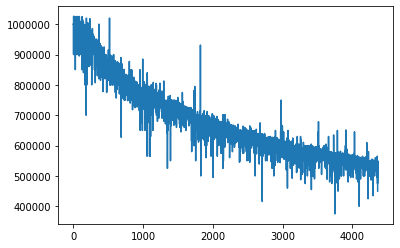

In [22]:
plt.plot(df.sold_price)

In [23]:
median_price = np.median(df.sold_price)
min_price = np.min(df.sold_price)
max_price = np.max(df.sold_price)
mean_price = np.mean(df.sold_price)

In [24]:
print('Median: ' + str(median_price) + ' Min: ' + str(min_price) + ' Max: ' + str(max_price) + ' Mean: ' + str(mean_price))

Median: 650000.0 Min: 375000.0 Max: 1026000.0 Mean: 679472.696554783


In [25]:
med_category_high = median_price + (0.25*median_price)
med_category_low = median_price - (0.25*median_price)
print(med_category_high)
print(med_category_low)

812500.0
487500.0


In [26]:
mean_taxes = np.mean(df.taxes)
mean_hoa = np.mean(df.HOA)
mean_acres = np.mean(df.lot_acres)
mean_year = np.mean(df.year_built)

### Converting prices to categories

In [27]:
a = df.sold_price.to_numpy()

In [28]:
low = 615000
high = 812500
price_categories = ["%.2f" % number for number in a]
for i in range(len(price_categories)):
    price = float(price_categories[i])
    if price >= high:
        price_categories[i] = 2
    if float(price) < 812500 and price >= low:
        price_categories[i] = 1
    if price < low:
        price_categories[i] = 0

### Converting continuous values to binary

In [29]:
median_hoa = np.median(df.HOA)
print('Median HOA: ' + str(median_hoa))
print('Mean HOA: ' + str(mean_hoa))

Median HOA: 62.0
Mean HOA: 70.00924238791656


In [30]:
hoa_binary = df.HOA.to_numpy()
for i in range(len(hoa_binary)):
    if hoa_binary[i] > mean_hoa:
        hoa_binary[i] = 1
    else:
        hoa_binary[i] = 0

In [31]:
median_taxes = np.median(df.taxes)
print('Median taxes: ' + str(median_taxes))
print('Mean taxes: ' + str(mean_taxes))

Median taxes: 6019.0
Mean taxes: 6157.504231599137


In [32]:
taxes_binary = df.taxes.to_numpy()
for i in range(len(taxes_binary)):
    if taxes_binary[i] > mean_taxes:
        taxes_binary[i] = 1
    else:
        taxes_binary[i] = 0

In [33]:
median_acres = np.median(df.lot_acres)
print('Median acres: ' + str(median_acres))
print('Mean acres: ' + str(mean_acres))

Median acres: 0.94
Mean acres: 1.8935291297051067


In [34]:
acres_binary = df.lot_acres.to_numpy()
for i in range(len(acres_binary)):
    if acres_binary[i] > mean_acres:
        acres_binary[i] = 1
    else:
        acres_binary[i] = 0

In [35]:
median_year = np.median(df.year_built)
print('Median acres: ' + str(median_year))
print('Mean acres: ' + str(mean_year))

Median acres: 1999.0
Mean acres: 1994.970270918245


In [36]:
year_binary = df.year_built.to_numpy()
for i in range(len(year_binary)):
    if year_binary[i] > mean_hoa:
        year_binary[i] = 1
    else:
        year_binary[i] = 0

In [37]:
sqrt_ft = df['sqrt_ft'].to_numpy()
for i in range(len(sqrt_ft)):
    if type(sqrt_ft[i]) == str:
        sqrt_ft[i] = sqrt_ft[i].replace('list(', '')
        sqrt_ft[i] = sqrt_ft[i].replace(')','')
        if sqrt_ft[i] == 'NA':
            sqrt_ft[i] = 3330
    sqrt_ft[i] = float(sqrt_ft[i])

In [38]:
median_sqrt_ft = np.median(sqrt_ft)
mean_sqrt_ft = np.mean(sqrt_ft)
print('Median square feet: ' + str(median_sqrt_ft))
print('Mean square feet: ' + str(mean_sqrt_ft))

Median square feet: 3419.0
Mean square feet: 3513.633565092304


In [39]:
sqrt_ft_binary = sqrt_ft
for i in range(len(sqrt_ft_binary)):
    if sqrt_ft[i] > mean_sqrt_ft:
        sqrt_ft_binary[i] = 1
    else:
        sqrt_ft_binary[i] = 0

In [40]:
data = np.vstack((taxes_binary, acres_binary, hoa_binary, year_binary, sqrt_ft_binary))
data = np.transpose(data)
n = len(data)

In [41]:
data.shape

(4171, 5)

In [42]:
import math
train_size = math.ceil(0.8 * data.shape[0])
train_size

3337

### Testing and Training Datasets

In [43]:
train = data[:train_size, :]

In [44]:
train.shape

(3337, 5)

In [45]:
test_size = n - train_size

In [46]:
test = data[train_size:train_size+test_size, :]

In [47]:
test.shape

(834, 5)

In [48]:
labels_train = np.array(price_categories[:train_size])
labels_test = np.array(price_categories[train_size:train_size+test_size])

In [49]:
labels_train.shape

(3337,)

### Training

In [50]:
highs = [high for high in labels_train if high == 2]
meds = [med for med in labels_train if med == 1]
lows = [low for low in labels_train if low == 0]

In [51]:
marginals = np.array([len(lows)/train_size, len(meds)/train_size, len(highs)/train_size])

In [52]:
marginals

array([0.23164519, 0.56547797, 0.20287684])

In [53]:
# (feature i, example j, label k)
conditionals = np.zeros((5, len(train), 3))
for i in range(5):
    for j in range(train_size):
        if train[j][i] == 1:
            if labels_train[j] == 0:
                conditionals[i][j][0] += 1
            if labels_train[j] == 1:
                conditionals[i][j][1] += 1
            if labels_train[j] == 2:
                conditionals[i][j][2] += 1

In [54]:
conditionals_ = np.zeros((5, 3))

In [55]:
for i in range(5):
    conditionals_[i] = conditionals[i].sum(axis=0)

In [56]:
conditionals_ = conditionals_ / train_size

In [57]:
conditionals_

array([[0.0647288 , 0.30866047, 0.1648187 ],
       [0.05334132, 0.12586155, 0.05304165],
       [0.09349715, 0.26161223, 0.12046749],
       [0.23164519, 0.56547797, 0.20287684],
       [0.07401858, 0.26970333, 0.161822  ]])

In [58]:
def pred(x):
    high = 0
    med = 0
    low = 0
    for i in range(len(x)):
        if i == 0 and x[i] == 1:
            if low == 0:
                low = conditionals_[i][0] * marginals[0]
            else:
                low *= conditionals_[i][0] * marginals[0]
        if i == 1 and x[i] == 1:
            if med == 0:
                med = conditionals_[i][1] * marginals[1]
            else:
                med *= conditionals_[i][1] * marginals[1]
        if i == 2 and x[i] == 1:
            if high == 0:
                high = conditionals_[i][2] * marginals[2] 
            else:
                high *= conditionals_[i][2] * marginals[2] 
    probs = [low, med, high]
    return np.argmax(probs)

## Evaluate Na√Øve Bayes Classifier

In [59]:
preds = 0
for i in range(test_size):
    if pred(test[i]) == labels_test[i]:
        preds += 1
accuracy = preds / len(test)
accuracy * 100

46.882494004796165